In [24]:
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use([hep.style.CMS])

In [25]:
def quotient(a, b): # quotient uncertainty
    y = a / b
    uy = y * (1. / a + 1. / b) ** 0.5
    return y, uy

def trigger(a, b, c, uc, d, ud): # trigger uncertainty
    y = (a / b) * (c / d)
    uy = y * (1. / a + 1. / b + (uc/c)**2 + (ud/d)**2) ** 0.5
    return y, uy

In [44]:
## DATA EXTRACTED FROM ANALYSIS IN efficiencies.ipynb ## 


Nevents     =   {
                "Ntot" :
                    {"QCD" : 21335910, "Z" : 459000, "H" : 448000},
                "kin and HLT" :
                    {"HLT_Mu17_Photon30"                : {"QCD" : 26, "Z" : 81829, "H" : 142102}},
                "kin" :
                    {"Mu18 Ph32"                        : {"QCD" : 34,  "Z" : 98630,    "H" : 160587},
                    "Mu18 Ph24 dR04"                    : {"QCD" : 29,  "Z" : 113505,   "H" : 168665},
                    "Mu20, Ph26.3 dR035"                : {"QCD" : 18,  "Z" : 102523,   "H" : 164061},
                    "Mu15, Ph20 2mumuM4"                : {"QCD" : 28,  "Z" : 125836,   "H" : 173615},
                    "Mu17.5, Ph23.5 2.25mumuM3.5"       : {"QCD" : 5,   "Z" : 115324,   "H" : 168506},
                    "Mu15, Ph23.5 2.7mumuM3.5"          : {"QCD" : 10,  "Z" : 120744,   "H" : 168785},
                    "Mu10 Mu5 Photon22.7 2mumuM4"       : {"QCD" : 35,  "Z" : 129513,   "H" : 174286}}

                ## NOT USED FOR NOW ##
                #"HLT" :
                #    {"HLT_Mu17_Photon30"  : {"QCD" : 34, "Z" : 87263, "H" : 144804}},

                } 



efficiency  =   {
                "trigger" : 
                    {"HLT_Mu17_Photon30"                        : {"QCD" : None, "Z" : None, "H" : None},
                    "HLT_Mu18_Photon24_dR04"                    : {"QCD" : None, "Z" : None, "H" : None},
                    "HLT_Mu20_Photon26.3_dR035"                 : {"QCD" : None, "Z" : None, "H" : None},
                    "HLT_Mu15_Photon20_2mumuM4"                 : {"QCD" : None, "Z" : None, "H" : None},
                    "HLT_Mu17.5_Photon23.5_2.25mumuM3.5"        : {"QCD" : None, "Z" : None, "H" : None},
                    "HLT_Mu15_Photon23.5_2.7mumuM3.5"           : {"QCD" : None, "Z" : None, "H" : None},
                    "HLT_Mu10_Mu5_Photon22.7_2mumuM4"           : {"QCD" : None, "Z" : None, "H" : None}},
                "selection" :
                    {"Mu18 Ph32"                                : {"QCD" : None, "Z" : None, "H" : None}, # must have the same names as Nevents["kin"]
                    "Mu18 Ph24 dR04"                            : {"QCD" : None, "Z" : None, "H" : None},
                    "Mu20, Ph26.3 dR035"                        : {"QCD" : None, "Z" : None, "H" : None},
                    "Mu15, Ph20 2mumuM4"                        : {"QCD" : None, "Z" : None, "H" : None},
                    "Mu17.5, Ph23.5 2.25mumuM3.5"               : {"QCD" : None, "Z" : None, "H" : None},
                    "Mu15, Ph23.5 2.7mumuM3.5"                  : {"QCD" : None, "Z" : None, "H" : None},
                    "Mu10 Mu5 Photon22.7 2mumuM4"           : {"QCD" : None, "Z" : None, "H" : None}}

                }



In [45]:
for (kin, kinAndHLT) in zip(efficiency["selection"], efficiency["trigger"]):
    for nature in ("QCD", "Z", "H"):
        for kin in Nevents["kin"]:
            efficiency["selection"][kin][nature] = quotient(Nevents["kin"][kin][nature], Nevents["Ntot"][nature])

In [46]:
efficiency["selection"]["Mu18 Ph32"]

{'QCD': (1.5935575281298056e-06, 2.73293079171317e-07),
 'Z': (0.214880174291939, 0.0007541514205596815),
 'H': (0.358453125, 0.0010425562761256515)}

In [47]:
for (sel, trig) in zip(efficiency["selection"], efficiency["trigger"]):
    for nature in ("QCD", "Z", "H"):
        efficiency["trigger"][trig][nature] = trigger(Nevents["kin and HLT"]["HLT_Mu17_Photon30"][nature], Nevents["kin"]["Mu18 Ph32"][nature], *efficiency["selection"][sel][nature], *efficiency["selection"]["Mu18 Ph32"][nature])

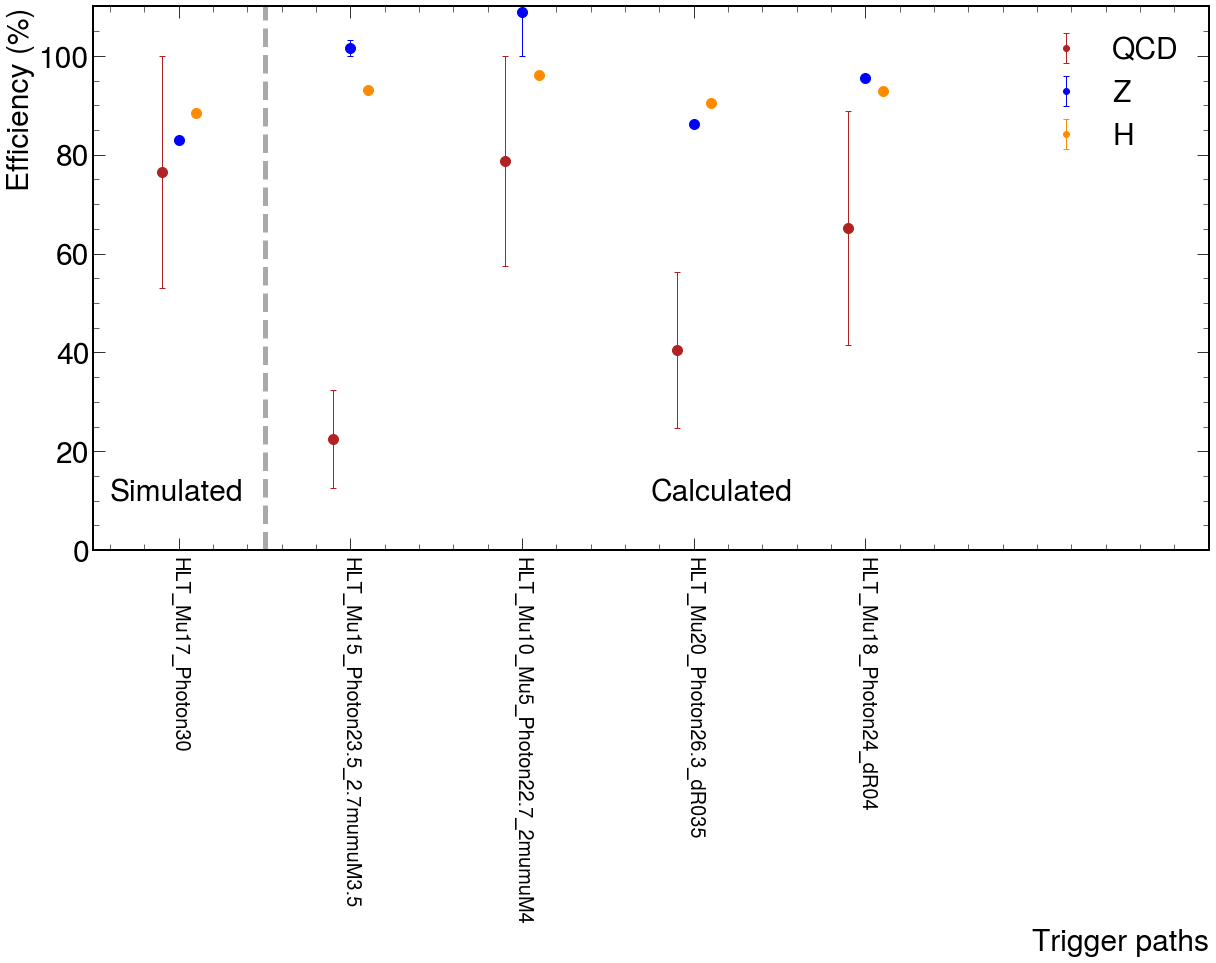

In [63]:
fig, ax = plt.subplots(figsize=(20, 10))
_labels = ["HLT_Mu17_Photon30", "HLT_Mu15_Photon23.5_2.7mumuM3.5", "HLT_Mu10_Mu5_Photon22.7_2mumuM4", "HLT_Mu20_Photon26.3_dR035", "HLT_Mu18_Photon24_dR04"]
_x = np.arange(len(_labels))

for i, HLT in enumerate(_labels):
    # QCD
    ax.plot(i - 0.1, 100 * efficiency["trigger"][HLT]["QCD"][0], marker = 'o', markersize = 10, c = "firebrick", lw = 0)
    ax.errorbar(i - 0.1, 100 * efficiency["trigger"][HLT]["QCD"][0], yerr = 100 * efficiency["trigger"][HLT]["QCD"][1] if 100 * efficiency["trigger"][HLT]["QCD"][1] + 100 * efficiency["trigger"][HLT]["QCD"][0] <= 100. else 100 - 100 * efficiency["trigger"][HLT]["QCD"][0], fmt = "o", capsize = 3., elinewidth = 1., lw = 0, color = "firebrick", label = "QCD" if i == 0 else None)

    # Z
    ax.plot(i, 100 * efficiency["trigger"][HLT]["Z"][0], marker = 'o', markersize = 10, c = "blue", lw = 0)
    ax.errorbar(i, 100 * efficiency["trigger"][HLT]["Z"][0], yerr = 100 * efficiency["trigger"][HLT]["Z"][1] if 100 * efficiency["trigger"][HLT]["Z"][1] + 100 * efficiency["trigger"][HLT]["Z"][0] <= 100. else 100 - 100 * efficiency["trigger"][HLT]["Z"][0], fmt = "o", capsize = 3., elinewidth = 1., lw = 0, color = "blue", label = "Z" if i == 0 else None)

    # H 
    ax.plot(i + 0.1, 100 * efficiency["trigger"][HLT]["H"][0], marker = 'o', markersize = 10, c = "darkorange", lw = 0)
    ax.errorbar(i + 0.1, 100 * efficiency["trigger"][HLT]["H"][0], yerr = 100 * efficiency["trigger"][HLT]["H"][1] if 100 * efficiency["trigger"][HLT]["H"][1] + 100 * efficiency["trigger"][HLT]["H"][0] <= 100. else 100 - 100 * efficiency["trigger"][HLT]["H"][0], fmt = "o", capsize = 3., elinewidth = 1., lw = 0, color = "darkorange", label = "H" if i == 0 else None)

ax.axvline(x = 0.5, linestyle = "dashed", color = "darkgrey", lw = 5.)

ax.text(x = -0.4, y = 10, s = "Simulated", fontsize = 30)
ax.text(x = (_x[-1]+2  - 0.5) / 2, y = 10, s = "Calculated", fontsize = 30)

ax.tick_params(axis = 'both', which = 'major', labelsize = 30)
ax.set_xlabel("Trigger paths", fontsize = 30)
ax.set_ylabel("Efficiency (%)", fontsize = 30)
ax.set_xlim(-0.5, _x[-1]+2)
ax.set_ylim(0., 110)
ax.legend(loc = "best", fontsize = 30)
ax.set_xticks(_x, _labels, rotation = -90, fontsize = 20)

In [55]:
efficiency["trigger"]["HLT_Mu15_Photon23.5_2.7mumuM3.5"]["QCD"]

(0.22491349480968853, 0.09989936434841672)